## References

Where I learned to join CSVs: https://www.geeksforgeeks.org/how-to-merge-multiple-csv-files-into-a-single-pandas-dataframe/

Where I learned to export CSVs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

Where I learned to set an ID for a specific column: https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/

Where I learned to clean data to make sure that they are integers: https://sparkbyexamples.com/pandas/pandas-convert-string-to-integer/

Where I learned to sort values using pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
        
Where I learned to use groupby: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
        
Where I learned to generate a bar chart: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
        
Where I learned to generate a scatter plot: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
        
Where I learned to generate a pie chart: https://www.plus2net.com/python/pandas-dataframe-plot-pie.php

In [7]:
import pandas as pd

all_top_songs = pd.concat(map(pd.read_csv, ['2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']), ignore_index = True)
all_top_songs['id'] = all_top_songs.index
all_top_songs[['id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']] = all_top_songs[['id', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']].astype(int)

## What is the most popular song in the dataset?

The code below shows the top 10 most popular songs.

In [8]:
all_top_songs.sort_values(by='pop', ascending=False).head(10)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,id
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99,572
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97,573
574,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96,574
575,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95,575
576,577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93,576
578,579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92,578
577,578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92,577
580,581,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90,580
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90,581
579,580,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90,579


The bar chart below shows the same information above.

<Axes: title={'center': 'Top 10 Songs by Popularity'}, xlabel='Song title', ylabel='Popularity score'>

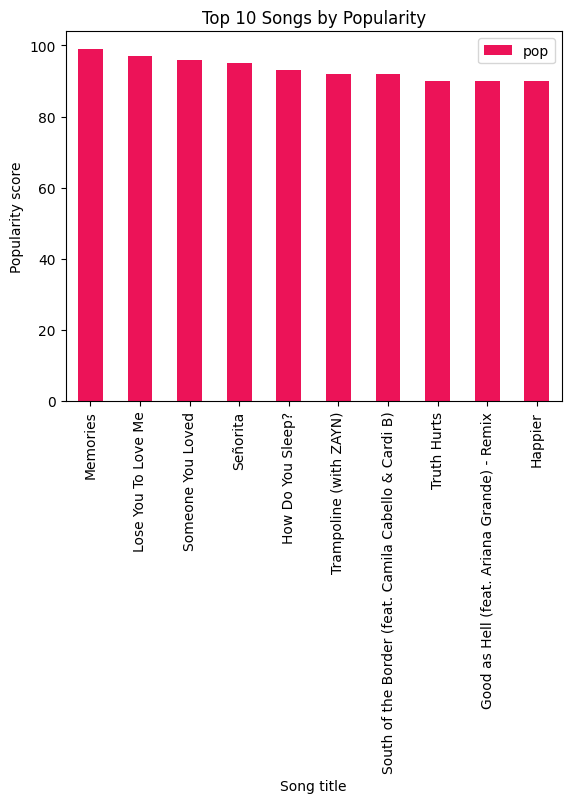

In [9]:
top_10_songs = all_top_songs.sort_values(by='pop', ascending=False).head(10)
top_10_songs.plot.bar(x='title', y='pop', title='Top 10 Songs by Popularity', xlabel='Song title', ylabel='Popularity score', color='#ec1358')

#### The most popular song, with a popular score of 99, is "Memories" by Maroon 5.

## What artist has the most songs in the dataset?

The code below shows the top 10 artists with the highest number of total number of songs in the dataset.

In [10]:
all_top_songs['artist'].value_counts().head(10)

artist
Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Pitbull             11
Ed Sheeran          11
The Chainsmokers    11
Name: count, dtype: int64

The bar chart below shows the same information presented above.

<Axes: title={'center': 'Top 10 Artists with Most Songs'}, xlabel='Artist', ylabel='Number of songs'>

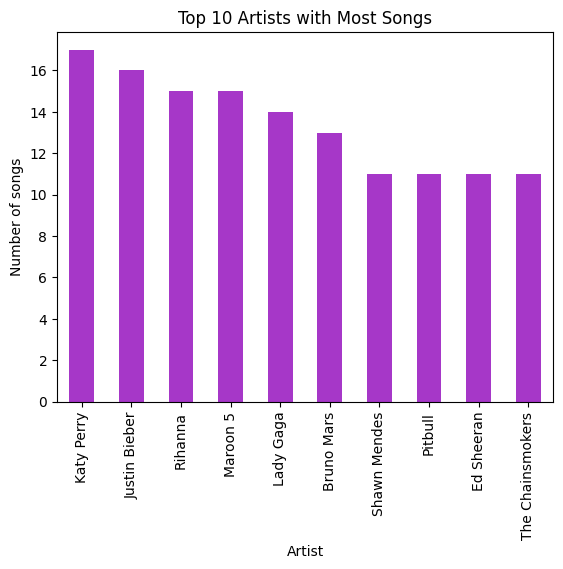

In [12]:
top_10_artists = all_top_songs['artist'].value_counts().head(10)
top_10_artists.plot.bar(x='Artist', title='Top 10 Artists with Most Songs', xlabel='Artist', ylabel='Number of songs', color='#a637c8')

#### Katy Perry has the most songs in the dataset (17).

## What is the most popular genre of music in the dataset?

The code belows shows the top 10 genres of all songs in the dataset by average popularity score.

In [14]:
all_top_songs.groupby('top genre').pop.mean().sort_values(ascending=False).head(10)

top genre
escape room                  90.000000
brostep                      86.000000
alternative r&b              84.000000
irish singer-songwriter      81.000000
danish pop                   80.000000
celtic rock                  80.000000
electronic trap              79.500000
edm                          78.200000
canadian contemporary r&b    77.666667
electropop                   77.461538
Name: pop, dtype: float64

The bar chart below shows the same information presented above.

<Axes: title={'center': 'Top 10 Most Popular Genres'}, xlabel='Genre', ylabel='Average popularity of genre'>

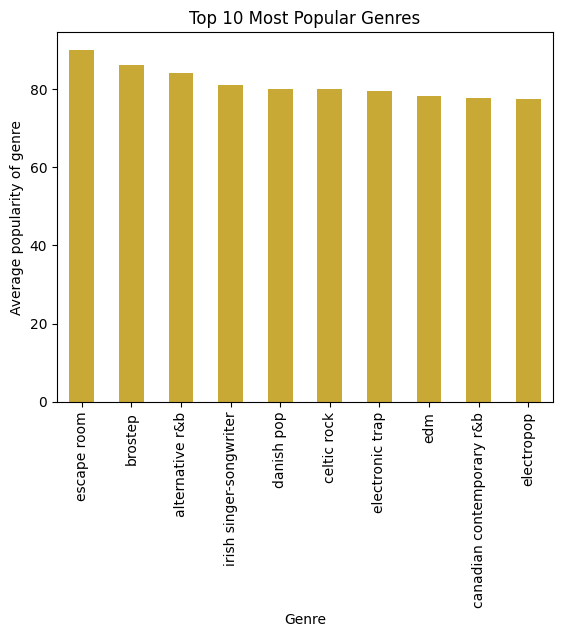

In [17]:
top_10_genres = all_top_songs.groupby('top genre').pop.mean().sort_values(ascending=False).head(10)
top_10_genres.plot.bar(x='top genre', title='Top 10 Most Popular Genres', xlabel='Genre', ylabel='Average popularity of genre', color='#c9a936')

#### The most popular genre of music in the dataset is escape room, with an average popularity score of 90.

## Are there any songs in the dataset more than once?

#### Yes, 19 songs were mentioned twice, as shown below.

In [235]:
all_top_songs['title'].value_counts().head(19)

title
A Little Party Never Killed Nobody (All We Got)    2
All I Ask                                          2
Kissing Strangers                                  2
Written in the Stars (feat. Eric Turner)           2
The Hills                                          2
Love Yourself                                      2
We Are Never Ever Getting Back Together            2
Sugar                                              2
Say Something                                      2
First Time                                         2
Stitches                                           2
I Like It                                          2
Hello                                              2
Castle Walls (feat. Christina Aguilera)            2
Company                                            2
Runnin' (Lose It All)                              2
Marry You                                          2
Just the Way You Are                               2
Here                                    

The songs that were mentioned twice were "A Little Party Never Killed Anybody (All We Got)", "All I Ask", "Kissing Strangers", "Written in the Stars (feat. Eric Turner)", "The Hills", "Love Yourself", "We Are Never Ever Getting Back Together", "Sugar", "Say Something", "First Time", "Stitches", "I Like It", "Hello", "Castle Walls (feat. Christina Aguilera)", "Company", "Runnin' (Lose It All)", "Marry You", "Just the Way You Are" and "Here".

The pie chart below shows the distribution of songs mentioned once and songs mentioned more than once.

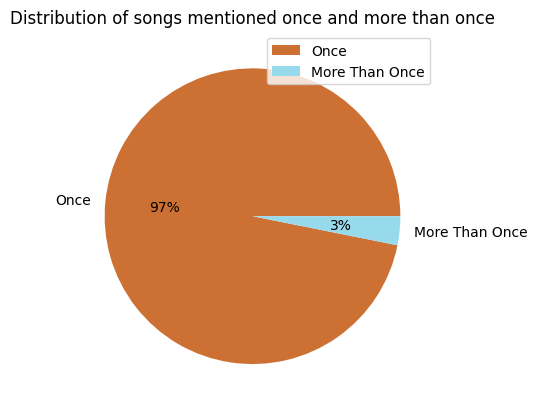

In [236]:
more_than_once = len(all_top_songs['title'].value_counts().head(19))
once = len(all_top_songs['title'].value_counts().head(584))

frequency_dict = {"Frequency": ["Once", "More Than Once"], "Number": [once, more_than_once]}
frequency_data = pd.DataFrame(data=frequency_dict)
frequency_labels = ["Once", "More Than Once"]
frequency_colors = ['#cc7133', '#96daeb']
frequency_pie = frequency_data.plot.pie(title='Distribution of songs mentioned once and more than once', y="Number", labels=frequency_labels, autopct='%1.0f%%', colors=frequency_colors)
frequency_pie.yaxis.set_visible(False)

#### 3% of songs were mentioned more than once.

## Is there a relationship between popularity and danceability?

The code below shows a scatter plot summarizing the relationship of popularity and danceability.

<Axes: title={'center': 'Is there a relationship between popularity and danceability?'}, xlabel='Popularity score', ylabel='Danceability score'>

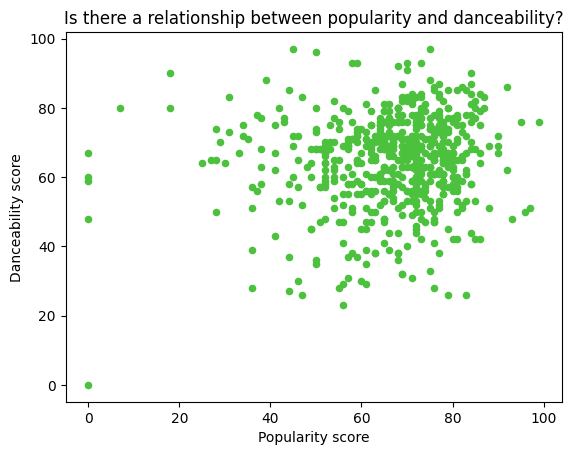

In [239]:
top_songs_plot = all_top_songs.sort_values(by='pop', ascending=False)
top_songs_plot.plot.scatter(x='pop', y='dnce', title='Is there a relationship between popularity and danceability?', xlabel='Popularity score', ylabel='Danceability score', color='#4cc13e')

As we can see in the scatter plot above, the danceability scores are generally varied, and the plot does not show a clear correlation between the two variables. 

#### Hence there is no clear relationship between popularity and danceability.

## Does having a higher bpm lead to having a higher energy score?

The scatter plot below shows the relationship between BPM and energy scores.

<Axes: title={'center': 'Does having a higher bpm lead to having a higher energy score?'}, xlabel='BPM', ylabel='Energy score'>

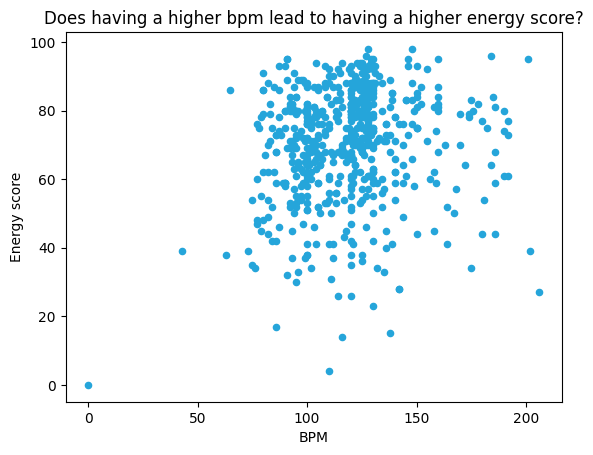

In [242]:
bpm_songs = all_top_songs.sort_values(by='bpm')
bpm_songs.plot.scatter(x='bpm', y='nrgy', title='Does having a higher bpm lead to having a higher energy score?', xlabel='BPM', ylabel='Energy score', color='#25a5da')

As we can see, the energy scores are very varied, and the scatter plot does not show a clear correlation between the two variables. 

#### Hence a higher bpm does not necessarily lead to a higher energy score.

## Which genre has the highest energy score?

The line of code below shows the top 10 genres with highest average energy scores.

In [9]:
all_top_songs.groupby('top genre').nrgy.mean().sort_values(ascending=False).head(10)

top genre
french indie pop    89.000000
electro house       88.000000
indie pop           87.500000
celtic rock         87.000000
candy pop           86.000000
colombian pop       83.333333
atl hip hop         82.200000
hollywood           82.000000
latin               80.500000
boy band            80.266667
Name: nrgy, dtype: float64

The bar chart below shows the same information presented above.

<Axes: title={'center': 'Top 10 Genres with Highest Energy Scores'}, xlabel='Genre', ylabel='Mean energy score'>

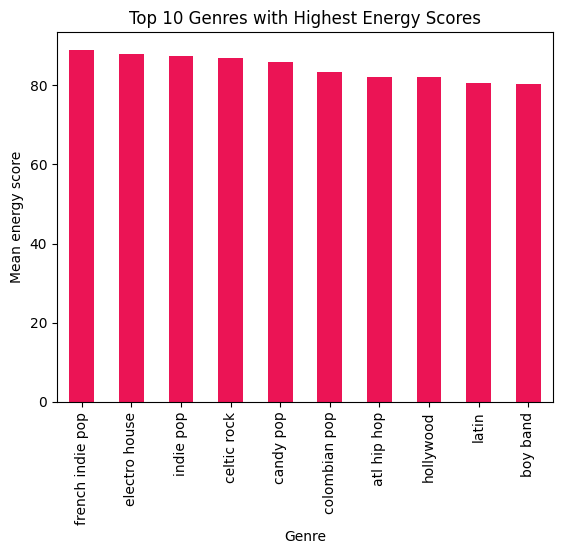

In [245]:
top_10_genres = all_top_songs.groupby('top genre').nrgy.mean().sort_values(ascending=False).head(10)
top_10_genres.plot.bar(x='top genre', y='nrgy', title='Top 10 Genres with Highest Energy Scores', xlabel='Genre', ylabel='Mean energy score', color='#eb1455')

#### French Indie Pop is the genre with the highest energy score (89.0).

## What percentage of songs may have been recorded live?

18 songs, as seen below, have a live score of more than 50.

In [246]:
all_top_songs.sort_values(by='live', ascending=False).head(18)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,id
400,401,NO,Meghan Trainor,dance pop,2016,92,80,56,-4,74,65,214,1,22,70,400
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90,581
12,13,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,130,82,77,-5,70,63,213,18,5,73,12
354,355,Time of Our Lives,Pitbull,dance pop,2015,124,80,72,-6,69,72,229,9,6,45,354
63,64,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73,63
101,102,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011,126,81,65,-4,67,72,231,0,4,27,101
175,176,Play Hard (feat. Ne-Yo & Akon) - New Edit,David Guetta,dance pop,2013,130,87,72,-3,66,68,209,4,4,67,175
42,43,Hard,Rihanna,barbadian pop,2010,182,75,31,-4,65,16,251,1,11,57,42
292,293,Don't,Ed Sheeran,pop,2015,95,61,81,-7,64,85,220,1,7,74,292
559,560,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,82,44,48,-10,64,62,304,81,24,65,559


The pie chart below shows the distribution of live and non-live songs.

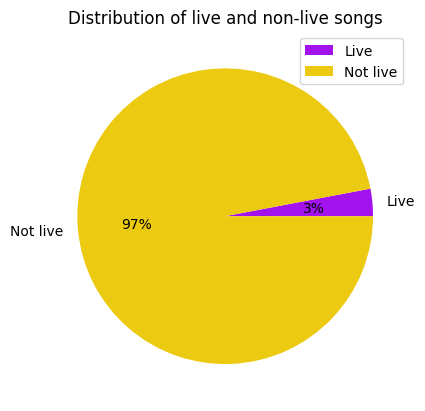

In [247]:
live = len(all_top_songs.sort_values(by='live', ascending=False).head(18))
not_live = len(all_top_songs.sort_values(by='live', ascending=True).head(585))

live_dict = {"Live": ["Live", "Not live"], "Frequency": [live, not_live]}
live_values = pd.DataFrame(data=live_dict)
live_labels = ["Live", "Not live"]
live_colors = ['#a212ed', '#edca12']
live_pie = live_values.plot.pie(title='Distribution of live and non-live songs', y='Frequency', labels=live_labels, autopct='%1.0f%%', colors=live_colors)
live_pie.yaxis.set_visible(False)

There are a total of 603 songs in the dataset. Hence, the percentage of songs that were recorded live would be:

18/603 = 0.03

#### 3% of songs may have been recorded live.

## What percentage of songs were acoustic?

44 songs, as seen below, have an acoustic score above 50.

In [10]:
all_top_songs.sort_values('acous', ascending=False).head(44)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,id
431,432,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47,431
255,256,Not About Angels,Birdy,neo mellow,2014,116,14,41,-10,9,23,190,97,4,56,255
186,187,Clown,Emeli Sandé,dance pop,2013,130,23,45,-8,11,23,221,92,4,60,186
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86,210
96,97,Turning Page,Sleeping At Last,acoustic pop,2011,125,38,30,-8,11,19,255,91,3,46,96
436,437,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36,436
52,53,Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,285,89,3,80,52
330,331,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,17,52,134,88,3,63,330
276,277,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80,276
398,399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71,398


The pie chart below shows the distribution of acoustic and non-acoustic songs.

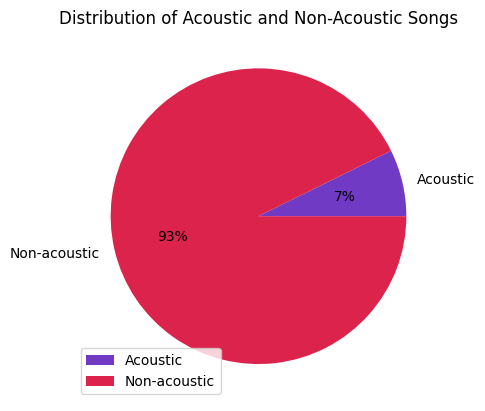

In [250]:
acoustic = len(all_top_songs.sort_values('acous', ascending=False).head(44))
non_acoustic = len(all_top_songs.sort_values('acous', ascending=True).head(559))

acoustic_colors = ['#703ac5', '#dc234b']

acoustic_dict = {"Acoustic Values": ['Acoustic', 'Non-acoustic'], "Frequency": [acoustic, non_acoustic]}
acoustic_labels = ['Acoustic', 'Non-acoustic']
acoustic_values = pd.DataFrame(data=acoustic_dict)
acoustic_pie = acoustic_values.plot.pie(y='Frequency', title='Distribution of Acoustic and Non-Acoustic Songs', autopct='%1.0f%%', labels=acoustic_labels, colors=acoustic_colors)
acoustic_pie.yaxis.set_visible(False)

There are a total of 603 songs in the dataset, hence the percentage of acoustic songs are:
    
44/603 = 0.07

#### 7% of songs are acoustic.

## Which year’s songs have the highest amount of spoken word in the song?

The code below lists the different years of songs present in the dataset by the average number of spoken words.

In [251]:
all_top_songs.groupby('year').spch.mean().sort_values(ascending=False)

year
2017    9.784615
2011    9.660377
2010    8.882353
2014    8.672414
2018    8.625000
2016    8.362500
2013    8.309859
2019    8.129032
2015    7.052632
2012    5.800000
Name: spch, dtype: float64

The bar chart below shows the years ordered by average number of words per song.

<Axes: title={'center': 'Which year’s songs have the highest amount of spoken word in the song?'}, xlabel='Year', ylabel='Average number of words'>

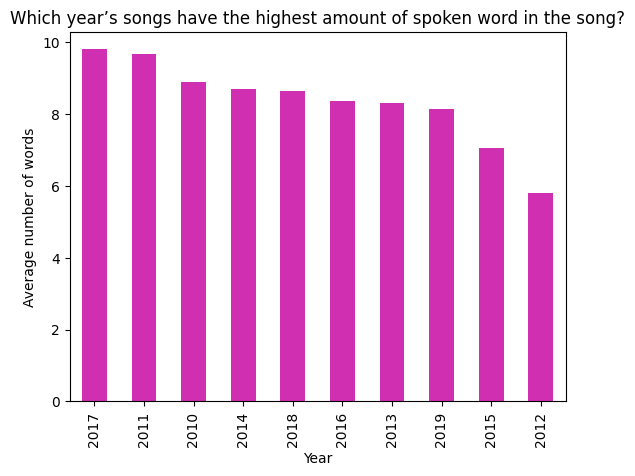

In [252]:
songs_by_year = all_top_songs.groupby('year').spch.mean().sort_values(ascending=False)
songs_by_year.plot.bar(x='year', y='spch', title='Which year’s songs have the highest amount of spoken word in the song?', xlabel='Year', ylabel='Average number of words', color='#d02fb2')

#### 2017 had the highest amount of spoken words in a song on average, of around 9.78 words.

## Create a single CSV

The code below exports all CSVs into one single CSV.

In [73]:
all_top_songs.to_csv('top_spotify_songs.csv')